<a href="https://colab.research.google.com/github/leelajk/Daily-Public-Transport-Passenger-Journeys/blob/main/Daily_Public_Transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analysing the dataset


In [43]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
data = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [5]:
print("Statistical Summary: ")
data.describe

Statistical Summary: 


<bound method NDFrame.describe of             Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0     30/08/2024        16436       10705           225        19026    3925   
1     15/09/2023        15499       10671           267        18421    4519   
2     28/12/2021         1756        2352             0         3775       0   
3     11/01/2023        10536        8347           223        14072       0   
4     11/09/2021          820         612             0         1283       0   
...          ...          ...         ...           ...          ...     ...   
1913  19/01/2023        11337        8671           262        14881       0   
1914  16/08/2023        16791       11800           387        20936    4684   
1915  10/01/2022         5732        3548            73         6644       0   
1916  04/05/2020         3717        1952            70         4411     131   
1917  26/07/2023        16680       11726           347        20438    4738   

      Other  
0      59.0  
1      61.0  
2      13.0  
3      48.0  
4      11.0  
...     ...  
1913   66.0  
1914  113.0  
1915   25.0  
1916   19.0  
1917   99.0  

[1918 rows x 7 columns]>

In [10]:
print("Colums present in the dataset: ", data.columns)
print("Rows and columns size:", data.shape)
print("Missing values: ",data.isnull().sum())


Colums present in the dataset:  Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')
Rows and columns size: (1918, 7)
Missing values:  Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [11]:
print("Statistics of the data:")
data.describe()

Statistics of the data:


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


2. Preprocessing the dataset

In [17]:
data["Other"] = data["Other"].ffill()
print("Missing values in the column Other")


Missing values in the column Other


In [19]:
data.isnull()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1913,False,False,False,False,False,False,False
1914,False,False,False,False,False,False,False
1915,False,False,False,False,False,False,False
1916,False,False,False,False,False,False,False


3. DATA PREPARATION


In [29]:
data = data.reset_index().rename(columns={"ds": "Date"})

In [30]:
data

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total Ridership
0,2019-07-01,15987,9962,407,21223,3715,28,51322
1,2019-07-02,16895,10656,409,21715,3993,2,53670
2,2019-07-03,16613,10658,427,22025,3638,0,53361
3,2019-07-04,16604,10445,437,21868,3576,82,53012
4,2019-07-05,16040,10532,400,20697,2856,0,50525
...,...,...,...,...,...,...,...,...
1913,2024-09-25,21,0,1,10,8,67,107
1914,2024-09-26,9,0,0,0,2,16,27
1915,2024-09-27,6,0,0,13,0,1,20
1916,2024-09-28,1,0,0,4,0,87,92


In [31]:
if "Date" in data.columns:
    data = data.rename(columns={"Date": "ds"})

# Convert the 'ds' column into proper datetime format
# Time-series models require actual datetime values (not strings) to understand order and seasonality
data["ds"] = pd.to_datetime(
    data["ds"],
    dayfirst=True,
    errors="coerce"
)

# Remove rows where the timestamp could not be interpreted
before_drop = len(data)
data = data.dropna(subset=["ds"]).copy()
dropped_rows = before_drop - len(data)
print(f"\nDate parsing complete. Rows removed due to invalid dates: {dropped_rows}")

# 3.2 Use the date as index and enforce chronological order — required for forecasting
data = data.sort_values("ds").set_index("ds")

# 3.3 Clean ridership fields (convert to numeric and resolve missing values)
route_columns = ["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School", "Other"]
route_columns = [c for c in route_columns if c in data.columns]     # keep only columns that exist

for col in route_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")           # convert text → numeric

# Forward fill is used first to preserve trends, then remaining gaps are safely set to zero
data[route_columns] = data[route_columns].ffill().fillna(0)

# Convert final ridership values to integer counts (since passenger counts can't be decimals)
data[route_columns] = data[route_columns].astype(int)

print("\nMissing values in ridership columns after cleaning:")
print(data[route_columns].isna().sum())

# 3.4 Compute total demand across all ridership categories
# This aggregated field is later useful for analysis and forecasting
data["Total Ridership"] = data[route_columns].sum(axis=1)

print("\nColumns available after preprocessing:")
print(data.columns)



Date parsing complete. Rows removed due to invalid dates: 0

Missing values in ridership columns after cleaning:
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

Columns available after preprocessing:
Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'Total Ridership'],
      dtype='object')


4. BASIC TIME-SERIES EXPLORATION

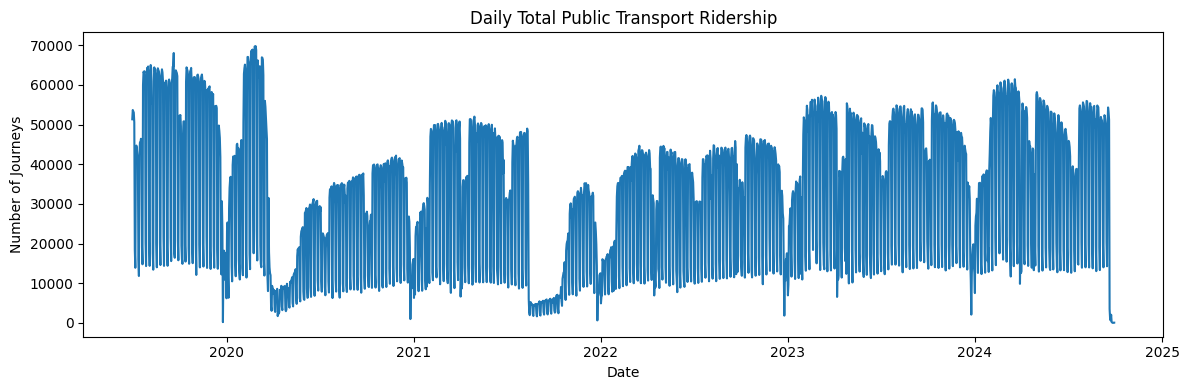

In [32]:
# Daily total ridership
plt.figure(figsize=(12, 4))
plt.plot(data.index, data["Total Ridership"])
plt.title("Daily Total Public Transport Ridership")
plt.xlabel("Date")
plt.ylabel("Number of Journeys")
plt.tight_layout()
plt.show()

Inference: It shows how busy public transport was every day, and helps us see whether demand is growing, falling, or has seasonal ups and downs.

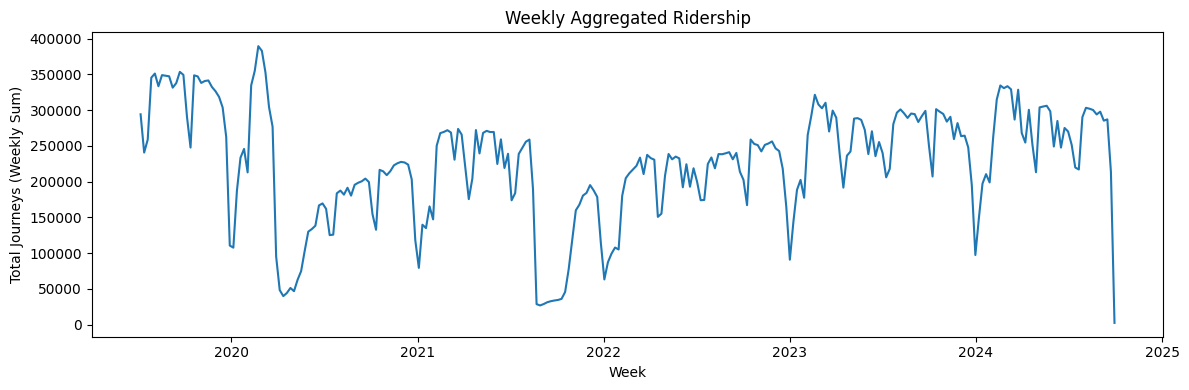

In [35]:
weekly_totals = data["Total Ridership"].resample("W").sum()

plt.figure(figsize=(12, 4))
plt.plot(weekly_totals.index, weekly_totals.to_numpy())
plt.title("Weekly Aggregated Ridership")
plt.xlabel("Week")
plt.ylabel("Total Journeys (Weekly Sum)")
plt.tight_layout()
plt.show()


Inference: It smooths out daily noise and makes long-term demand trends clearer — we can tell whether the city is using public transport more or less over time.

In [37]:
# index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

data["DayOfWeek"] = data.index.day_name()


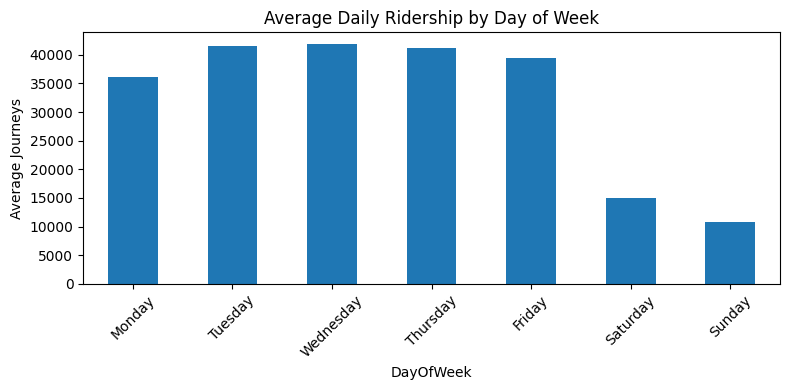

In [38]:
# Average ridership by day of week
data["DayOfWeek"] = data.index.day_name()
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

mean_by_dow = (
    data.groupby("DayOfWeek")["Total Ridership"]
    .mean()
    .reindex(dow_order)
)

plt.figure(figsize=(8, 4))
mean_by_dow.plot(kind="bar")
plt.title("Average Daily Ridership by Day of Week")
plt.ylabel("Average Journeys")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inference: It shows which days of the week are the busiest. Weekdays usually have higher ridership due to office and school travel, and weekends typically drop because fewer people commute.

5. **SARIMA FORECASTING**

In [46]:
# List of routes to model
ROUTES_TO_MODEL = [
    c for c in ["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School"]
    if c in data.columns
]

# Forecast + test configuration
# days to forecast into the future
# last 60 days used for evaluation
 # weekly seasonal cycle
forecast_days = 7
test_window = 60
seasonal_span = 7

# SARIMA model orders
arima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, seasonal_span)

print("Routes:", ROUTES_TO_MODEL)


Routes: ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']



Route under analysis: Local Route
  SARIMA fit completed.
  RMSE on test set: 6707.12
  MAPE on test set: 41144.00%


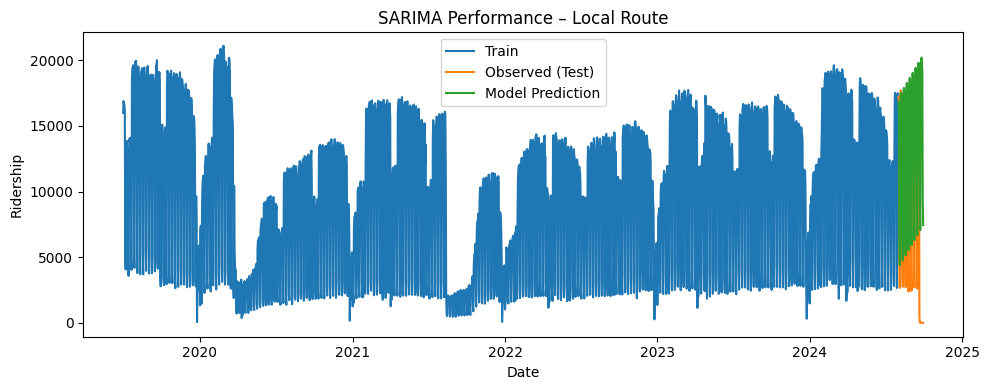


Route under analysis: Light Rail
  SARIMA fit completed.
  RMSE on test set: 4071.67
  MAPE on test set: 381348698521170411520.00%


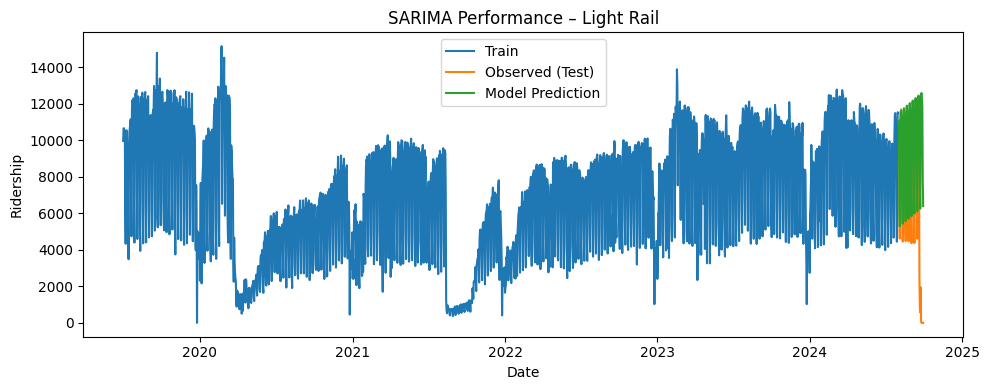


Route under analysis: Peak Service
  SARIMA fit completed.
  RMSE on test set: 103.75
  MAPE on test set: 13357413613435795456.00%


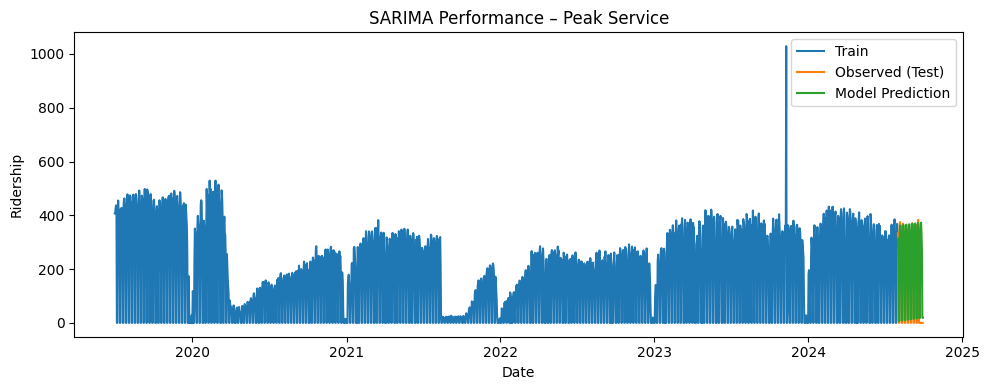


Route under analysis: Rapid Route
  SARIMA fit completed.
  RMSE on test set: 8610.06
  MAPE on test set: 181665453423760113664.00%


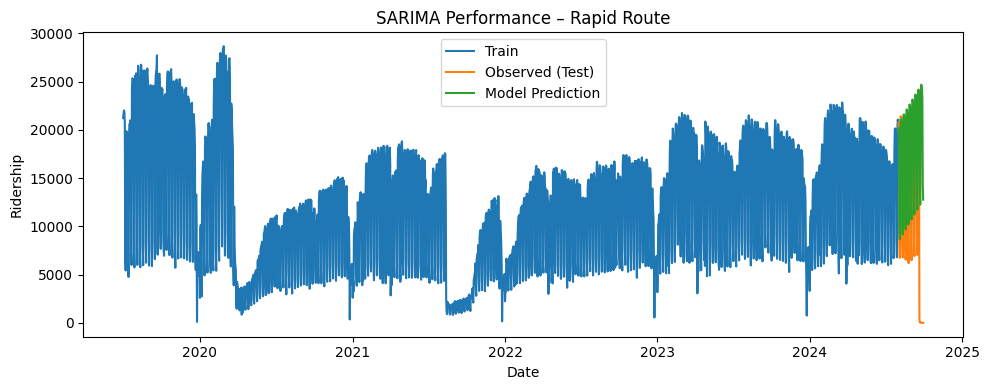


Route under analysis: School
  SARIMA fit completed.
  RMSE on test set: 1473.67
  MAPE on test set: 61602794169193816064.00%


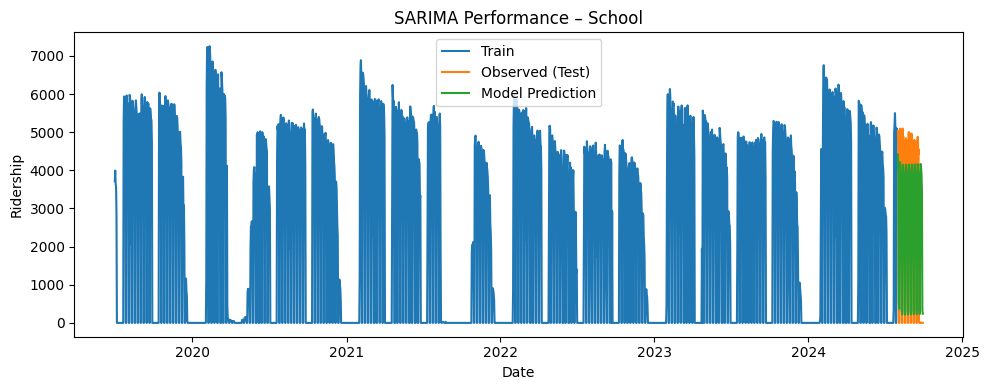


=== Forecast Accuracy (Test Period) ===


,RMSE,MAPE (%)
Route,,
Local Route,6707.118641,4.114400e+04
Light Rail,4071.671260,3.813487e+20
Peak Service,103.749325,1.335741e+19
Rapid Route,8610.063727,1.816655e+20
School,1473.674345,6.160279e+19


In [47]:
from math import sqrt   # required for RMSE

route_forecasts = {}
evaluation_records = []

for route in ROUTES_TO_MODEL:
    print(f"\nRoute under analysis: {route}")
    series = data[route].asfreq("D").fillna(0)

    # Train/Test split
    if len(series) <= test_window + 30:
        print("  Series too short for a proper hold-out set; training on full history.")
        train = series
        test = None
    else:
        train = series.iloc[:-test_window]
        test = series.iloc[-test_window:]

    # define last observed timestamp BEFORE try block
    last_obs = series.index.max()

    try:
        model = SARIMAX(
            train,
            order=arima_order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_result = model.fit(disp=False)
        print("  SARIMA fit completed.")

        # Evaluate if test exists
        if test is not None:
            pred_obj = model_result.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
            predicted = pred_obj.predicted_mean.reindex(test.index)

            rmse = sqrt(mean_squared_error(test.values, predicted.values))
            mape = mean_absolute_percentage_error(test.values, predicted.values) * 100

            print(f"  RMSE on test set: {rmse:.2f}")
            print(f"  MAPE on test set: {mape:.2f}%")

            evaluation_records.append({"Route": route, "RMSE": rmse, "MAPE (%)": mape})

            plt.figure(figsize=(10, 4))
            plt.plot(train.index, train.values, label="Train")
            plt.plot(test.index, test.values, label="Observed (Test)")
            plt.plot(predicted.index, predicted.values, label="Model Prediction")
            plt.title(f"SARIMA Performance – {route}")
            plt.xlabel("Date")
            plt.ylabel("Ridership")
            plt.legend()
            plt.tight_layout()
            plt.show()

        # Forward forecast
        forecast_obj = model_result.get_forecast(steps=forecast_days)
        forecast_values = forecast_obj.predicted_mean

        cleaned_forecast = forecast_values.apply(lambda x: max(0, x)).round(0).astype(int)
        cleaned_forecast.index = pd.date_range(start=last_obs + pd.Timedelta(days=1),
                                               periods=forecast_days, freq="D")

        route_forecasts[route] = cleaned_forecast

    except Exception as err:
        print(f"  Model could not be estimated for {route}: {err}")
        print("  Falling back to repeating the last observed week.")

        last_week = series.iloc[-7:]
        fallback_values = [last_week[i % 7] for i in range(forecast_days)]
        fallback_index = pd.date_range(start=last_obs + pd.Timedelta(days=1),
                                       periods=forecast_days, freq="D")
        route_forecasts[route] = pd.Series(fallback_values, index=fallback_index).astype(int)

# Accuracy table
if evaluation_records:
    metrics_df = pd.DataFrame(evaluation_records).set_index("Route")
    print("\n=== Forecast Accuracy (Test Period) ===")
    display(metrics_df)


6. MERGE FORECASTS AND VISUALIZE


Forecast table (first few rows):


,Local Route,Light Rail,Peak Service,Rapid Route,School
Date,,,,,
2024-09-30,16820,11061,313,20177,4413
2024-10-01,16034,10750,256,19244,3801
2024-10-02,6262,6694,7,10123,547
2024-10-03,4388,5290,7,8660,371
2024-10-04,15127,10002,300,19012,3134


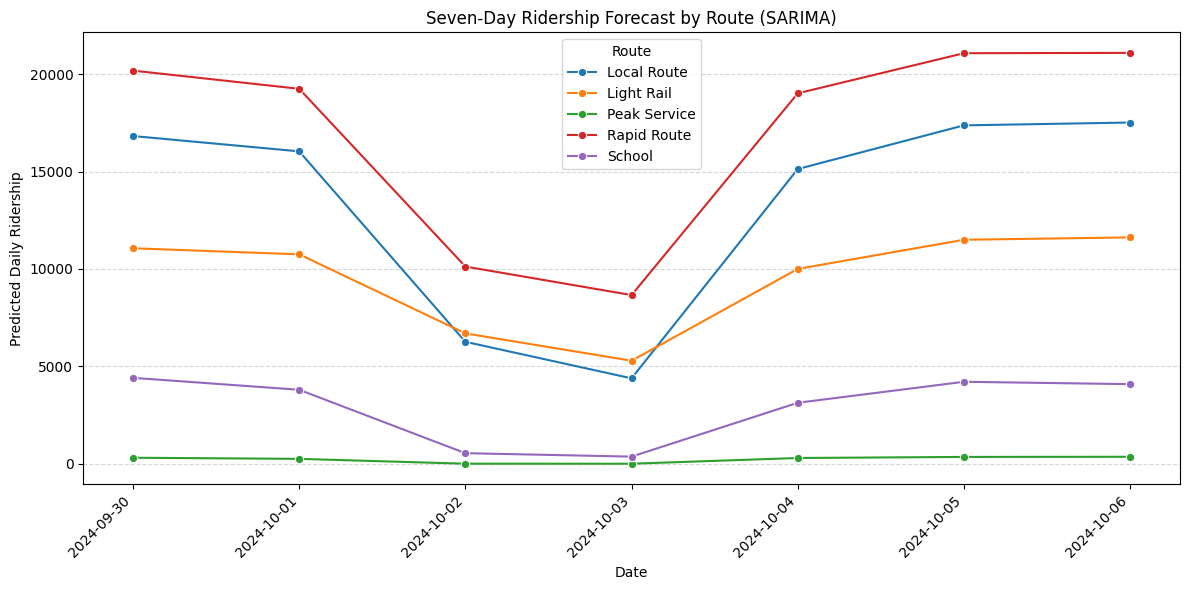

In [48]:

forecast_table = pd.DataFrame(route_forecasts)
forecast_table.index.name = "Date"
print("\nForecast table (first few rows):")
display(forecast_table.head())

# Reshape for plotting
forecast_long = (
    forecast_table
    .reset_index()
    .melt(id_vars="Date", var_name="Route", value_name="Forecasted Ridership")
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=forecast_long,
    x="Date",
    y="Forecasted Ridership",
    hue="Route",
    marker="o"
)
plt.title("Seven-Day Ridership Forecast by Route (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Predicted Daily Ridership")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

 INSIGHT: SCHOOL VS NON-SCHOOL DAYS


INSIGHT 1: Effect of School Service on Other Routes


,School Active Avg,School Inactive Avg,Relative Change (%)
Local Route,14410.698132,4790.250832,200.833894
Light Rail,9122.023599,5020.830189,81.683571
Peak Service,278.464110,67.967814,309.699968
Rapid Route,16853.546706,7792.894562,116.268122


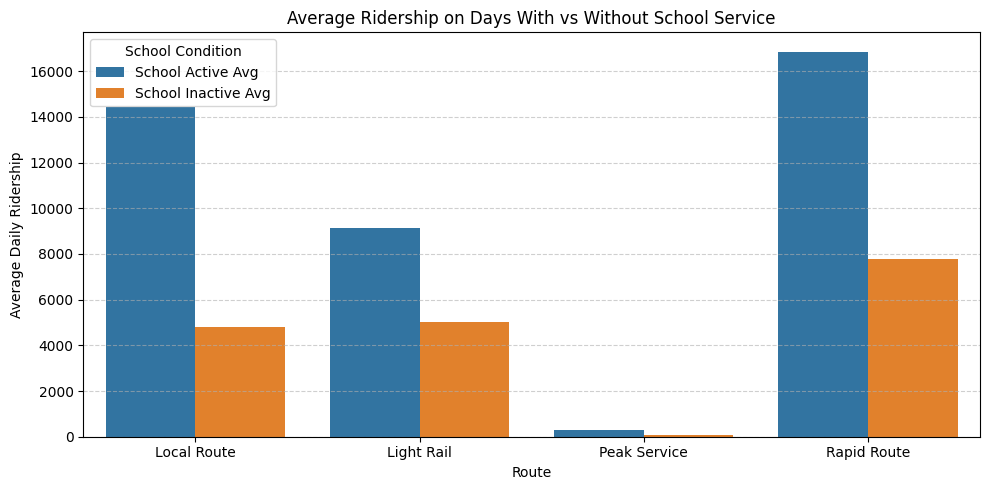


Route-level impact summary:
  - Local Route: +200.8% change in demand when school trips operate.
  - Light Rail: +81.7% change in demand when school trips operate.
  - Peak Service: +309.7% change in demand when school trips operate.
  - Rapid Route: +116.3% change in demand when school trips operate.


In [49]:
print("\n" + "=" * 70)
print("INSIGHT 1: Effect of School Service on Other Routes")
print("=" * 70)

if "School" in data.columns:
    days_school_active = data[data["School"] > 0]
    days_school_idle = data[data["School"] == 0]

    affected_routes = [
        c for c in ["Local Route", "Light Rail", "Peak Service", "Rapid Route"]
        if c in data.columns
    ]

    avg_when_active = days_school_active[affected_routes].mean().rename("School Active Avg")
    avg_when_idle = days_school_idle[affected_routes].mean().rename("School Inactive Avg")

    school_effect = pd.concat([avg_when_active, avg_when_idle], axis=1)
    school_effect["Relative Change (%)"] = (
        100
        * (school_effect["School Active Avg"] - school_effect["School Inactive Avg"])
        / school_effect["School Inactive Avg"]
    )

    display(school_effect)

    # Visual comparison
    plot_tbl = (
        school_effect[["School Active Avg", "School Inactive Avg"]]
        .reset_index()
        .rename(columns={"index": "Route"})
    )
    plot_long = plot_tbl.melt(
        id_vars="Route",
        var_name="School Condition",
        value_name="Avg Ridership"
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=plot_long,
        x="Route",
        y="Avg Ridership",
        hue="School Condition"
    )
    plt.title("Average Ridership on Days With vs Without School Service")
    plt.ylabel("Average Daily Ridership")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\nRoute-level impact summary:")
    for r in affected_routes:
        delta = school_effect.loc[r, "Relative Change (%)"]
        print(f"  - {r}: {delta:+.1f}% change in demand when school trips operate.")
else:
    print("Column 'School' not present in dataset; skipping this insight.")

8. INSIGHT: WEEKDAY VS WEEKEND

INSIGHT 2: Weekday vs Weekend Utilization


,Weekday Avg,Weekend Avg,Weekend Drop (%)
Peak Service,251.413869,0.000000,100.000000
Local Route,12755.348175,2731.512774,78.585353
Light Rail,8355.815328,4294.523723,48.604372
Rapid Route,15297.278102,5847.051095,61.777180


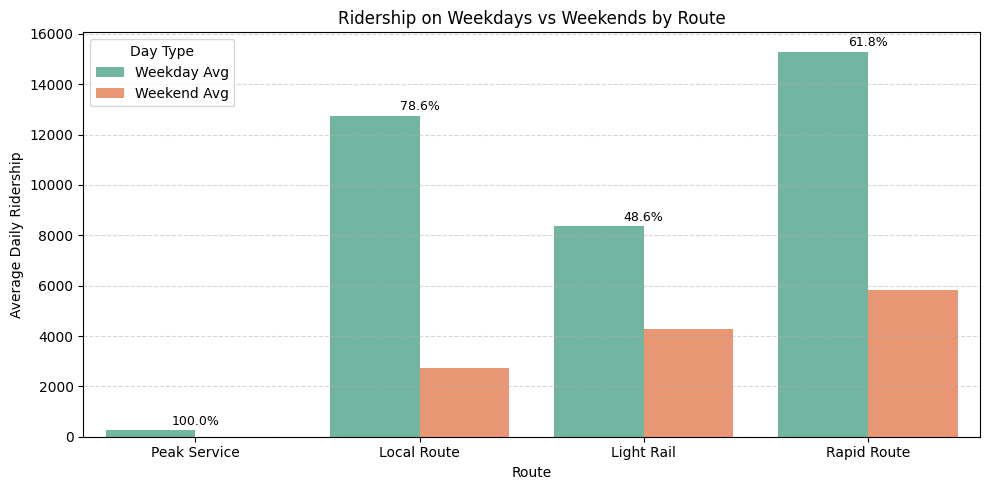


Interpretation:
Routes with strong weekday demand but much weaker weekends may have excess capacity on weekends.
Such lines are candidates for schedule adjustments or vehicle redeployment to high-demand corridors.


In [60]:
print("INSIGHT 2: Weekday vs Weekend Utilization")
data["IsWeekend"] = data.index.weekday >= 5  # Saturday/Sunday

routes_for_week_pattern = [
    c for c in ["Peak Service", "Local Route", "Light Rail", "Rapid Route"]
    if c in data.columns
]

weekday_rows = data[~data["IsWeekend"]]
weekend_rows = data[data["IsWeekend"]]

weekday_means = weekday_rows[routes_for_week_pattern].mean().rename("Weekday Avg")
weekend_means = weekend_rows[routes_for_week_pattern].mean().rename("Weekend Avg")

weekday_weekend = pd.concat([weekday_means, weekend_means], axis=1)
weekday_weekend["Weekend Drop (%)"] = (
    100
    * (weekday_weekend["Weekday Avg"] - weekday_weekend["Weekend Avg"])
    / weekday_weekend["Weekday Avg"]
)

display(weekday_weekend)

viz_wk = (
    weekday_weekend[["Weekday Avg", "Weekend Avg"]]
    .reset_index()
    .rename(columns={"index": "Route"})
)
viz_wk_long = viz_wk.melt(
    id_vars="Route",
    var_name="Day Type",
    value_name="Average Ridership"
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=viz_wk_long,
    x="Route",
    y="Average Ridership",
    hue="Day Type",
    palette="Set2"
)

for i, r in enumerate(weekday_weekend.index):
    drop = weekday_weekend.loc[r, "Weekend Drop (%)"]
    plt.text(
        i,
        weekday_weekend.loc[r, "Weekday Avg"] + 100,
        f"{drop:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Ridership on Weekdays vs Weekends by Route")
plt.ylabel("Average Daily Ridership")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("Routes with strong weekday demand but much weaker weekends may have excess capacity on weekends.")
print("Such lines are candidates for schedule adjustments or vehicle redeployment to high-demand corridors.")


9. INSIGHT: SCHOOL BREAKS ON WEEKDAYS

INSIGHT 3: Weekday Patterns When School Demand Collapses


IsSchoolBreak,School In Session,School Break,Absolute Drop,Drop (%)
Local Route,14653.517588,7718.872,6934.645588,47.324102
Rapid Route,17086.884422,10548.856,6538.028422,38.263432
School,4535.030151,0.144,4534.886151,99.996825


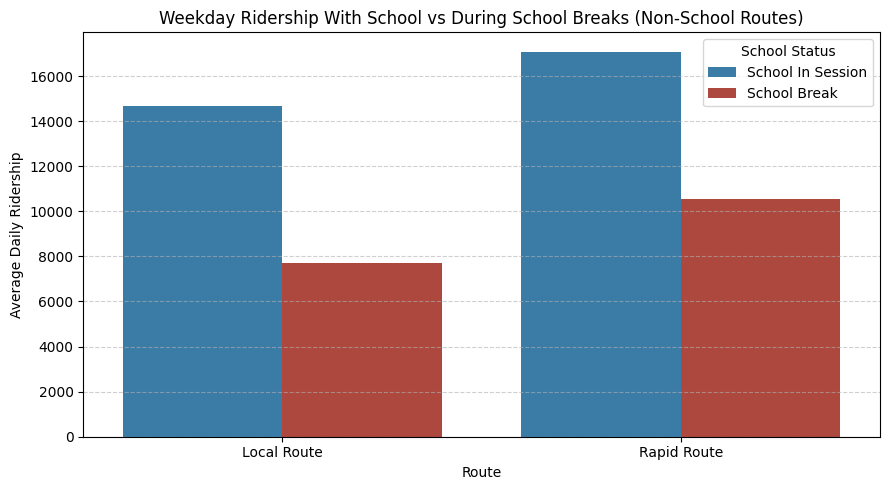

In [56]:
print("INSIGHT 3: Weekday Patterns When School Demand Collapses")

if "School" in data.columns:
    weekday_subset = data[(data.index.weekday >= 0) & (data.index.weekday <= 4)]

    # Threshold below which school demand is treated as 'break'
    SCHOOL_BREAK_THRESHOLD = 10
    weekday_subset = weekday_subset.copy()
    weekday_subset["IsSchoolBreak"] = weekday_subset["School"] <= SCHOOL_BREAK_THRESHOLD

    routes_focus = [c for c in ["Local Route", "Rapid Route", "School"] if c in weekday_subset.columns]

    grouped = weekday_subset.groupby("IsSchoolBreak")[routes_focus].mean()
    grouped.index = grouped.index.map({False: "School In Session", True: "School Break"})

    school_break_insight = grouped.T
    school_break_insight["Absolute Drop"] = (
        school_break_insight["School In Session"] - school_break_insight["School Break"]
    )
    school_break_insight["Drop (%)"] = (
        100
        * school_break_insight["Absolute Drop"]
        / school_break_insight["School In Session"]
    )

    display(school_break_insight)

    # Show only non-school routes in the visualization
    non_school_routes = [r for r in routes_focus if r != "School"]
    plot_break = school_break_insight.loc[
        non_school_routes, ["School In Session", "School Break"]
    ]
    plot_break_df = plot_break.reset_index().rename(columns={"index": "Route"})
    plot_break_long = plot_break_df.melt(
        id_vars="Route",
        var_name="School Status",
        value_name="Average Ridership"
    )

    plt.figure(figsize=(9, 5))
    sns.barplot(
        data=plot_break_long,
        x="Route",
        y="Average Ridership",
        hue="School Status",
        palette=["#2980b9", "#c0392b"]
    )
    plt.title("Weekday Ridership With School vs During School Breaks (Non-School Routes)")
    plt.ylabel("Average Daily Ridership")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No 'School' column in dataset; skipping this analysis.")

10. INSIGHT: EVOLUTION OF 'OTHER' CATEGORY

INSIGHT 4: Long-Term Behaviour of 'Other' Ridership


,Year,Avg Other Share (%)
0,2019,0.156623
1,2020,0.084351
2,2021,0.223738
3,2022,0.180222
4,2023,0.156144
5,2024,1.426283


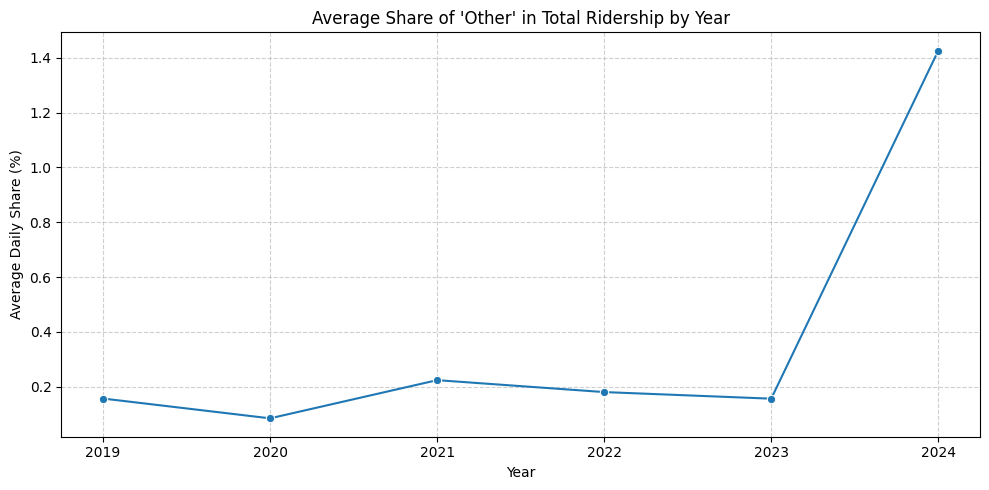

Between 2019 and 2024, the average share of 'Other' changed by 810.6%.

Inference:
A rising 'Other' share suggests that more journeys are not being categorized into
standard route buckets, which may indicate data quality issues or emerging patterns
That require new route definitions.


In [61]:
print("INSIGHT 4: Long-Term Behaviour of 'Other' Ridership")

if "Other" in data.columns:
    data["Other"] = data["Other"].ffill().fillna(0).astype(int)
    data["Total Ridership"] = data[route_columns].sum(axis=1)

    data["Other Share (%)"] = (
        100 * data["Other"] / data["Total Ridership"].replace(0, np.nan)
    )
    data["Year"] = data.index.year

    yearly_other = (
        data.groupby("Year")["Other Share (%)"]
        .mean()
        .reset_index()
        .rename(columns={"Other Share (%)": "Avg Other Share (%)"})
    )

    display(yearly_other)

    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=yearly_other,
        x="Year",
        y="Avg Other Share (%)",
        marker="o"
    )
    plt.title("Average Share of 'Other' in Total Ridership by Year")
    plt.ylabel("Average Daily Share (%)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    if len(yearly_other) >= 2:
        y_start = yearly_other["Year"].iloc[0]
        y_end = yearly_other["Year"].iloc[-1]
        v_start = yearly_other["Avg Other Share (%)"].iloc[0]
        v_end = yearly_other["Avg Other Share (%)"].iloc[-1]
        if v_start != 0:
            pct_change = 100 * (v_end - v_start) / v_start
            print(f"Between {y_start} and {y_end}, the average share of 'Other' changed by {pct_change:.1f}%.")
        else:
            print(f"Share starts at zero in {y_start}; percentage change is undefined.")

    print("\nInference:")
    print("A rising 'Other' share suggests that more journeys are not being categorized into")
    print("standard route buckets, which may indicate data quality issues or emerging patterns")
    print("That require new route definitions.")
else:
    print("The dataset has no 'Other' column; this insight cannot be computed.")
